In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import os
import matplotlib.pyplot as plt
import requests

In [2]:
new_cases = pd.read_csv("data/England/england_labels.csv")

In [3]:
new_cases

,name,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,...,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12
0,E10000032,3,6,1,3,9,9,9,8,10,...,8,13,5,4,7,3,8,10,13,8
1,E10000031,3,1,2,8,4,15,8,12,9,...,10,10,25,13,10,9,5,8,13,7
2,E10000030,5,9,9,13,19,34,22,26,24,...,16,20,26,13,13,5,6,11,13,8
3,E10000029,1,2,6,1,4,4,1,4,9,...,12,41,15,17,25,5,2,7,27,10
4,E10000028,6,4,7,8,5,11,13,15,18,...,13,21,33,29,18,16,6,12,23,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,E06000002,0,1,0,0,0,1,0,2,1,...,5,11,17,5,7,2,4,1,0,1
147,E06000042,0,1,1,0,3,12,6,2,4,...,4,4,4,4,2,1,0,1,4,0
148,E10000019,0,0,2,0,2,5,3,5,4,...,6,13,7,5,50,17,10,11,9,20
149,E06000041,0,0,2,0,1,4,2,2,0,...,3,0,1,1,6,2,1,2,2,3


In [4]:
area_codes = list(new_cases['name'])

In [5]:
n = pd.read_csv("Data/England_Fresh_data/whole_dataset.csv")

In [7]:
area_codes_1 = list(n['name'])

In [8]:
set(area_codes).difference(area_codes_1)

{'E06000053', 'E09000001'}

In [111]:
for i in range(1):
    code = area_codes[0]
    url = f"https://api.coronavirus.data.gov.uk/v2/data?areaType=utla&areaCode={code}&metric=newCasesBySpecimenDate&format=csv"
    try:
        response = requests.get(url)
        open(f"Data/England_Fresh_data/{code}.csv", "wb").write(response.content)
        area_codes.pop(0)
    except:
        print(f"Failed on {code}")
        break

In [112]:
len(area_codes)

0

In [71]:
people_movements = pd.read_csv("data/England/graphs/EN_2020-03-17.csv", header=None)

In [76]:
people_movements[people_movements[0] == 'E09000001']

,0,1,2
50,E09000001,E10000016,5407.0
51,E09000001,E09000004,3868.0
176,E09000001,E09000002,5993.0
233,E09000001,E09000006,2389.0
243,E09000001,E06000034,1849.0
...,...,...,...
2036,E09000001,E06000018,26.0
2042,E09000001,E08000031,14.0
2054,E09000001,E06000030,18.0
2055,E09000001,E09000020,15.0


In [ ]:
os.listdir("data/England/graphs")

In [28]:
new_cases.drop(["name"], axis=1).sum().to_numpy()

array([ 372,  305,  375,  534,  656,  878,  894, 1012,  989, 1171, 1944,
       1962, 2168, 2487, 2495, 2296, 2362, 3345, 3577, 3909, 3808, 3794,
       3157, 2904, 4054, 4220, 3985, 3805, 3303, 2778, 2546, 3123, 3180,
       3341, 3190, 3174, 2384, 1961, 2837, 2805, 2566, 2571, 2539, 1719,
       1328, 2094, 2132, 2212, 1993, 1859, 1195,  948, 1551, 1542, 1365,
       1354,  945,  865,  702, 1204, 1043], dtype=int64)

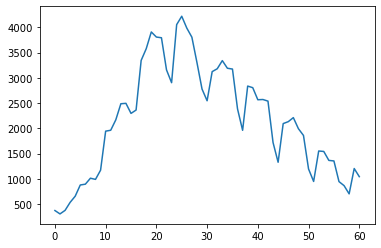

In [29]:
plt.plot(new_cases.drop(["name"], axis=1).sum().to_numpy())

In [31]:
fb_movement = pd.read_csv("data/Facebook_Movement_data/movement-range-2022-05-22.txt", delimiter="\t", low_memory=False)

In [35]:
uk_movement_data = fb_movement[fb_movement["country"] == "GBR"]

In [50]:
fb_movement["country"].unique()

array(['AGO', 'ALB', 'ARE', 'ARG', 'ASM', 'AUS', 'AUT', 'BDI', 'BEL',
       'BEN', 'BFA', 'BGD', 'BGR', 'BIH', 'BLR', 'BOL', 'BRA', 'BRN',
       'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CIV', 'CMR', 'COD',
       'COG', 'COL', 'CRI', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA',
       'FRO', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GLP', 'GMB', 'GNB',
       'GNQ', 'GRC', 'GTM', 'GUF', 'GUY', 'HKG', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRQ', 'ISL', 'ITA', 'JAM',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'LAO', 'LBN',
       'LBR', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MDA', 'MDG',
       'MEX', 'MKD', 'MLI', 'MLT', 'MNG', 'MOZ', 'MRT', 'MTQ', 'MUS',
       'MWI', 'MYS', 'NAM', 'NCL', 'NER', 'NGA', 'NIC', 'NLD', 'NOR',
       'NPL', 'NZL', 'OMN', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRT',
       'PRY', 'QAT', 'REU', 'ROU', 'RWA', 'SAU', 'SEN', 'SLE', 'SLV',
       'SRB', 'STP',

In [223]:
tables = {}

for filename in os.listdir("Data/England_Fresh_data"):
    tables[filename[:-4]] = pd.read_csv(f"Data/England_Fresh_data/{filename}").drop(["areaName", "areaType", "areaCode"], axis=1)

In [224]:
for area_code in tables.keys():
    tables[area_code] = pd.concat([pd.DataFrame([["name", area_code]], columns=["date", "newCasesBySpecimenDate"]), tables[area_code]], axis=0).reset_index(drop=True)

In [225]:
dates = set(tables['E06000001']['date'])
for area_code in tables.keys():
    dates = dates.intersection(set(tables[area_code]['date']))

dates = sorted(list(dates))
dates.remove('name')
dates.insert(0, 'name')

In [228]:
new_index = pd.Index(dates, name="date")
for area_code in tables.keys():
    tables[area_code] = tables[area_code].set_index("date").reindex(new_index).reset_index()

In [251]:
dataset = pd.DataFrame(columns = dates)
for idx, area_code in enumerate(tables.keys()):
    dataset.loc[idx] = list(tables[area_code]['newCasesBySpecimenDate'])

In [252]:
dataset

,name,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,...,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31,2023-02-01
0,E06000001,0,0,2,1,2,3,1,5,3,...,7,1,7,2,2,1,2,3,2,1
1,E06000002,1,2,7,7,7,10,14,17,15,...,2,9,9,10,7,9,4,7,10,2
2,E06000003,2,2,3,6,10,11,7,7,8,...,2,39,9,5,5,2,7,7,35,6
3,E06000004,3,2,2,6,8,9,4,16,8,...,6,6,5,6,4,3,7,9,9,5
4,E06000005,1,2,3,3,2,2,1,9,2,...,2,6,3,4,5,3,2,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,E10000029,16,10,5,18,20,6,20,23,26,...,23,32,37,28,28,16,44,44,31,24
145,E10000030,50,44,54,55,56,57,49,101,64,...,46,43,47,37,51,33,45,56,49,30
146,E10000031,28,20,14,27,18,26,25,40,20,...,17,19,25,22,27,23,22,21,48,17
147,E10000032,14,20,23,20,19,17,16,32,32,...,23,33,30,28,28,20,29,45,36,29


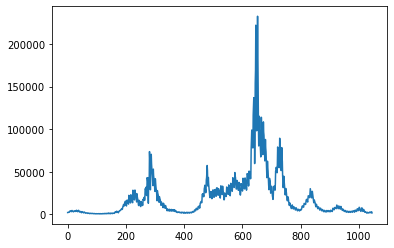

In [253]:
plt.plot(dataset.drop(["name"], axis=1).sum().to_numpy())

In [330]:
dataset.to_csv("Data/England_Fresh_data/whole_dataset.csv", index=False)

In [260]:
pcr = pd.read_csv("Data/England_Fresh_data/uk_planned_pcr.csv")

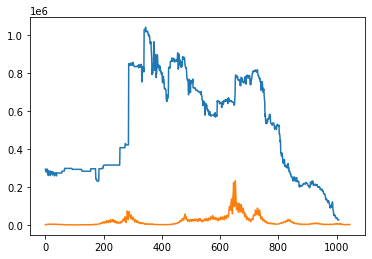

In [264]:
plt.plot(pcr['plannedPCRCapacityByPublishDate'].to_numpy())
plt.plot(dataset.drop(["name"], axis=1).sum().to_numpy())
plt.show()

In [318]:
final_graph = pd.read_csv(f"Data/England/graphs/EN_2020-03-13.csv", header=None) #pd.DataFrame(columns=[0, 1, 2])

for filename in os.listdir("Data/England/graphs")[1:]:
    
    movements = pd.read_csv(f"Data/England/graphs/{filename}", header=None)
    
    final_graph = pd.merge(final_graph, movements, on=[0, 1], how="outer")
    final_graph.columns = range(len(final_graph.columns))

In [319]:
final_graph

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,E10000019,E10000019,180647.0,188183.0,187896.0,184707.0,188475.0,189393.0,192070.0,192330.0,...,194702.0,193888.0,194488.0,193144.0,194189.0,197511.0,196465.0,193026.0,195202.0,193775.0
1,E10000032,E10000032,160550.0,166768.0,169194.0,164672.0,170924.0,173029.0,177309.0,177557.0,...,186218.0,187050.0,187514.0,186102.0,187357.0,190657.0,189386.0,187925.0,188595.0,186691.0
2,E10000030,E10000003,1498.0,834.0,622.0,1478.0,1419.0,1309.0,1289.0,1195.0,...,202.0,569.0,583.0,574.0,632.0,386.0,337.0,235.0,558.0,599.0
3,E10000030,E09000001,4321.0,2372.0,1408.0,3948.0,3102.0,2550.0,2386.0,2013.0,...,65.0,785.0,851.0,894.0,891.0,407.0,231.0,177.0,952.0,1009.0
4,E10000030,E09000029,1169.0,629.0,448.0,1126.0,1104.0,1040.0,943.0,907.0,...,130.0,359.0,403.0,438.0,446.0,263.0,213.0,156.0,404.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,E06000056,E06000031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2343,E10000016,E09000008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2344,E10000024,E08000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2345,E09000009,E09000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
final_graph['mean'] = final_table[final_table.columns[2:]].mean(axis=1)

In [321]:
final_graph

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,mean
0,E10000019,E10000019,180647.0,188183.0,187896.0,184707.0,188475.0,189393.0,192070.0,192330.0,...,193888.0,194488.0,193144.0,194189.0,197511.0,196465.0,193026.0,195202.0,193775.0,196606.709677
1,E10000032,E10000032,160550.0,166768.0,169194.0,164672.0,170924.0,173029.0,177309.0,177557.0,...,187050.0,187514.0,186102.0,187357.0,190657.0,189386.0,187925.0,188595.0,186691.0,187917.322581
2,E10000030,E10000003,1498.0,834.0,622.0,1478.0,1419.0,1309.0,1289.0,1195.0,...,569.0,583.0,574.0,632.0,386.0,337.0,235.0,558.0,599.0,546.290323
3,E10000030,E09000001,4321.0,2372.0,1408.0,3948.0,3102.0,2550.0,2386.0,2013.0,...,785.0,851.0,894.0,891.0,407.0,231.0,177.0,952.0,1009.0,878.451613
4,E10000030,E09000029,1169.0,629.0,448.0,1126.0,1104.0,1040.0,943.0,907.0,...,359.0,403.0,438.0,446.0,263.0,213.0,156.0,404.0,430.0,390.193548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,E06000056,E06000031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.333333
2343,E10000016,E09000008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
2344,E10000024,E08000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
2345,E09000009,E09000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


In [325]:
final_graph = final_graph[[0, 1, 'mean']]
final_graph.columns = ['from', 'to', 'value']
final_graph

,from,to,value
0,E10000019,E10000019,196606.709677
1,E10000032,E10000032,187917.322581
2,E10000030,E10000003,546.290323
3,E10000030,E09000001,878.451613
4,E10000030,E09000029,390.193548
...,...,...,...
2342,E06000056,E06000031,10.333333
2343,E10000016,E09000008,12.000000
2344,E10000024,E08000003,11.000000
2345,E09000009,E09000016,10.000000


In [328]:
final_graph.to_csv("Data/England_Fresh_data/edge_index.csv", index=False)

In [329]:
pd.read_csv("Data/England_Fresh_data/edge_index.csv")

,from,to,value
0,E10000019,E10000019,196606.709677
1,E10000032,E10000032,187917.322581
2,E10000030,E10000003,546.290323
3,E10000030,E09000001,878.451613
4,E10000030,E09000029,390.193548
...,...,...,...
2342,E06000056,E06000031,10.333333
2343,E10000016,E09000008,12.000000
2344,E10000024,E08000003,11.000000
2345,E09000009,E09000016,10.000000
